<a href="https://colab.research.google.com/github/akprodromou/DWS101-Machine-Learning/blob/main/Exercise5/Exercise5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DWS101
## Exercise 5

Από τη βιβλιογραφία διαβάζουμε πως πρόκειται για ένα dataset 60.000 εικόνων 28x28 που απεικονίζουν τα 10 ψηφία, με επιπλέον ένα test set 10.000 εικόνων.

Η πρώτη στήλη των δεδομένων μας δείχνει το ψηφίο στο οποίο αντιστοιχεί το σημείο. Οι υπόλοιπες στήλες περιέχουν τιμές pixel για κάθε ένα από τα 784 pixel (28*28). Οι τιμές τους κυμαίνονται από 0 έως 255. Όσο μεγαλύτερη είναι η τιμή pixel, τόσο πιο έντονο θα είναι το χρώμα του πλέγματος (0 για μαύρο και 255 για άσπρο δηλαδή).


### Μεταφόρτωση Βιβλιοθηκών

Let's start by importing our libraries:

In [128]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# για πράξεις
import random
import math
# για το γράφημα
import plotly.express as px
import plotly.graph_objects as go
# tensorflow
from tensorflow.keras.datasets import mnist
# training
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# για να φορτώσω την εικόνα που δημιουργώ
from google.colab import files
from IPython.display import Image
# αλλάζω το όνομα για να μην έχουμε clash μεθόδων
from PIL import Image as PILImage


ModuleNotFoundError: No module named 'kaleido'

And define our color visualization settings:

In [111]:
px.defaults.template = "plotly_white"
color_palette = ['#8c4053', '#40798C','#a170a9', '#70A9A1']

### Ερώτημα 1

*Φορτώστε το dataset ασπρόμαυρων χειρόγραφων ψηφίων της MNIST, που περιέχει 70,000 χειρόγραφα ψηφία (0 ως 9):*

Διαβάζουμε από το documentation πως το σύνολο δεδομένων έχει ήδη μοιραστεί σε training (60.000 δείγματα) και test (10.000 δείγματα), οπότε κάνουμε tuple unpacking:

In [112]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [113]:
y_train.shape[0]

60000

In [114]:
x_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         54, 227, 253, 252, 239, 233, 252,  57,   6,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  10,  60,
        224, 252, 253, 252, 202,  84, 252, 253, 122,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 163, 252,
        252, 252, 253, 252, 252,  96, 189, 253, 167,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 238, 253,
        253, 190, 114, 253, 228,  47,  79, 255, 168,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238, 252, 252,
        179,  12,  75, 121,  21,   0,   0, 253, 243,  50,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  38, 165, 253, 233, 208,
         84,   0,   0,   0,   0,   0,   0, 253, 252, 165,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   7, 178, 252, 240,  71,  19,
         28,   0,   0,   0,   0,   0,   0, 253, 252, 195,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  57, 252, 252,  63,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 253, 252, 195,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 198, 253, 190,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 255, 253, 196,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  76, 246, 252, 112,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 253, 252, 148,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 230,  25,   0,   0,   0,
          0,   0,   0,   0,   0,   7, 135, 253, 186,  12,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 223,   0,   0,   0,   0,
          0,   0,   0,   0,   7, 131, 252, 225,  71,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 145,   0,   0,   0,   0,
          0,   0,   0,  48, 165, 252, 173,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  86, 253, 225,   0,   0,   0,   0,
          0,   0, 114, 238, 253, 162,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 249, 146,  48,  29,  85,
        178, 225, 253, 223, 167,  56,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 252, 252, 229, 215, 252,
        252, 252, 196, 130,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  28, 199, 252, 252, 253, 252, 252,
        233, 145,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  25, 128, 252, 253, 252, 141,
         37,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

Δηλαδή τα x δεδομένα είναι ομοιογενείς σειρές δύο διαστάσεων.

In [115]:
y_train[1]

np.uint8(0)

Τα y δεδομένα είναι unsigned integers, δηλαδή θετικοί ακέραιοι με τιμές από 0 έως 255, με μέγεθος 8 bit (1 byte). Έχουν αποθηκευμένα τα labels για το εκάστοτε data point.

### Ερώτημα 2

*Εμφανίστε 1 πλοτ για κάθε ψηφίο (επιλέξτε τα τυχαία από το σύνολο δεδομένων).*

Θα χρησιμοποιήσω την imshow της plotly, η οποία δέχεται βαθμωτά input. Σύμφωνα με το documentation της, για να κάνω την απεικόνιση ασπρόμαυρη, θέτω cmap='gray'.

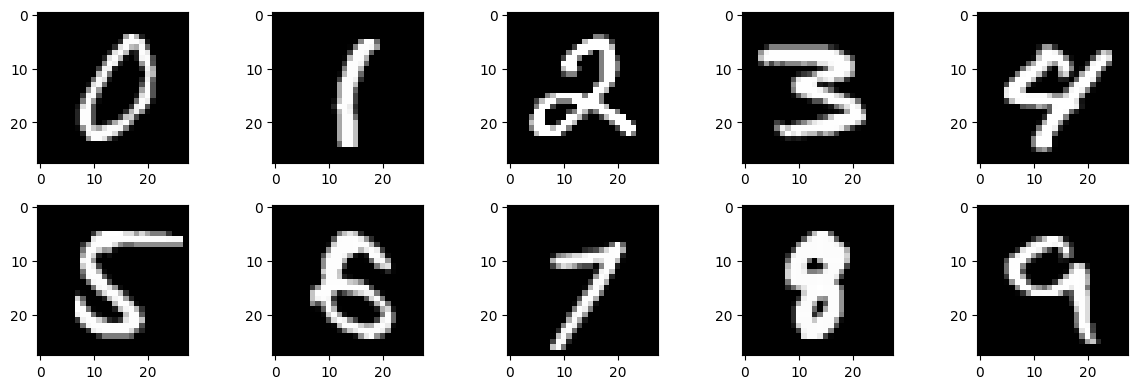

In [116]:
# οι διαστάσεις του κοινού plot
plt.figure(figsize=(12, 4))

for i in range(10):
  # για ένα τυχαίο σημείο από τα δεδομένα μου
  randon_number = random.randint(0, y_train.shape[0] - 1)
  while y_train[randon_number] != i:
    randon_number = random.randint(0, y_train.shape[0] - 1)
  # δύο γραμμές, πέντε στήλες
  plt.subplot(2, 5, i+1)
  plt.imshow(x_train[randon_number], cmap="gray")

plt.tight_layout()
plt.show()

### Ερώτημα 3

Τι μέγεθος έχει κάθε εικόνα; Είναι σημαντικά όλα τα pixel της εικόνας ενός ψηφίου? Αιτιολογήστε.

In [117]:
math.sqrt(x_train[0].size)

28.0

Άρα κάθε εικόνα έχει μέγεθος 28x28 pixels.

Αν παίρναμε ένα παράθυρο μόνο από τα π.χ. 8x8 px στο κέντρο κάθε ψηφίου, θα μπορούσαμε να κατευθυνθούμε καλύτερα προς ποιό ψηφίο είναι, καθώς π.χ. το 0 τείνει να μην καταλαμβάνεται από λευκά pixel εκεί, ενώ το 8, το 3 και το 6 ναι. Αντίθετα, εάν παίρναμε μόνο π.χ. την πάνω αριστερά γωνία, το 3 μοιάζει με το 6 και το 9, άρα δεν αποτελεί τόσο χαρακτηριστική περιοχή και είναι ήσσονος σημασία σε σχέση με το κέντρο. Το ίδιο ισχύει και με την κάτω ζώνη, όπου π.χ. το 1 μοιάζει με το 4 και το 9. Επιπλέον υπάρχει και μια ζώνη περίπου 3-4 pixel που θα μπορούσαμε συνολικά να κάνουμε crop. Άρα είναι περισσότερο σημαντικά τα κεντρικά pixel στο να εντοπίσουμε σωστά ποιό ψηφίο είναι.

### Ερώτημα 4

Μετατρέψτε τις εικόνες (x_train, x_test) σε διανύσματα.

In [118]:
print(x_train[0].shape)
x_train_vector = x_train[0].flatten()
print(x_train_vector.shape)

(28, 28)
(784,)


In [119]:
x_train_vector = [point.flatten() for point in x_train]

In [120]:
print(x_train_vector[0].shape)

(784,)


In [121]:
x_test_vector = [point.flatten() for point in x_test]

In [122]:
print(x_test_vector[0].shape)

(784,)


### Ερώτημα 5

Εκπαιδεύστε ταξινομητές KNN με k=5,15,51,√N , όπου N το πλήθος των παραδειγμάτων του  train set και υπολογίστε την ακρίβεια (accuracy score) στα train,test sets.

In [123]:
len(x_train_vector)
n = int(np.sqrt(len(x_train_vector)))
print(n)

244


Οπότε θα τρέξω μια for loop για τα 5 διαφορετικά nearest neighbours:

In [124]:
df_results = pd.DataFrame(columns=["K_value", "Train_accuracy", "Test_accuracy"])

In [125]:
k_values = [5, 15, 51, n]

for k in k_values:
    # αρχικοποίησε το μοντέλο
    knn = KNeighborsClassifier(n_neighbors=k)
    # αποθήκευσε τα δεδομένα εκπαίδευσης στη μνήμη
    knn.fit(x_train_vector, y_train)

    # οι προβλέψεις
    y_train_predictions = knn.predict(x_train_vector)
    y_test_predictions = knn.predict(x_test_vector)

    # χρησιμοποιώ το accuracy score της scikit learn
    train_accuracy = accuracy_score(y_train, y_train_predictions)
    test_accuracy = accuracy_score(y_test, y_test_predictions)

    new_row = pd.DataFrame({"K_value": [k], "Train_accuracy": [train_accuracy], "Test_accuracy": [test_accuracy]})
    df_results = pd.concat([df_results, new_row], ignore_index=True)

/tmp/ipython-input-3403064491.py:18: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



In [126]:
print(df_results)

  K_value  Train_accuracy  Test_accuracy
0       5        0.981917         0.9688
1      15        0.971000         0.9633
2      51        0.953233         0.9533
3     244        0.921067         0.9241


**Σχόλια**

Παρατηρούμε πως, τόσο στα δεδομένα εκπαίδευσης όσο και test, έχουμε μεγαλύτερη ακρίβεια όταν λαμβάνονται υπόψιν λιγότεροι γείτονες για την πρόβλεψη, εν προκειμένω 5.

Όταν ο αριθμός των γειτόνων είναι μικρός, το μοντέλο χαράσσει ένα πολύπλοκο διαχωριστικό σύνορο, έχοντας ταυτόχρονα μεγάλη ευαισθησία στα δεδομένα θορύβου. Σε αυτή την περίπτωση όμως το k=5 δεν οδηγεί σε υπεπροσαρμογή.

Καθώς αυξάνουμε τον αριθμό των γειτόνων, το σύνορο γίνεται πιο απλό, όμως αυτό σημαίνει πως δεν οριοθετεί τόσο καλά τις διαφορετικές κλάσεις. Στην περίπτωση των 244 γειτόνων, φαίνεται πως διαλέγοντας πολλά data points, λαμβάνουμε υπόψιν πολλούς απομακρυσμένους γείτονες, χάνοντας σε ακρίβεια.

Αξιοσημείωτο είναι πως για τον παραπάνω υπολογισμό το Google Colab χρειάστηκε περίπου 14 λεπτά. Η καθυστέρηση αυτή οφείλεται στο ότι στην πράξη δεν χτίσαμε κάποιο μοντέλο το οποίο καλούμε ανά την εξέταση ενός δείγματος, αλλά εξετάζεται η σχέση κάθε περίπτωσης με το training set εκείνη τη στιγμή, πρόκειται δηλαδή για μοντέλο αναβλητικής μάθησης (lazy learning).

*Στη συνέχεια, να δημιουργήσετε line plot με οριζόντιο άξονα το k και κάθετο άξονα την ακρίβεια.*


In [129]:
fig = px.line(
    df_results,
    x="K_value",
    y=["Train_accuracy", "Test_accuracy"],
    title='Ακρίβεια ανά αριθμό γειτόνων ΚΝΝ',
    width=800,
    height=600,
    color_discrete_sequence=color_palette
    )

fig.update_yaxes(title_text="Ακρίβεια")
fig.write_html("plot.html")
fig.show()

### Ερώτημα 6

*Στη συνέχεια, διαιρέστε τα x_train, x_test με το 255 ώστε οι τιμές των pixel να κλιμακωθούν μεταξύ [0, 1] και επαναλάβετε το ερώτημα 5. Συγκρίνετε τα αποτελέσματα σας με το ερώτημα 5.*

Ακολουθούμε όμοια διαδικασία με το ερώτημα 5:

In [130]:
x_train_vector_normalized = [point.flatten() for point in x_train/255]
x_test_vector_normalized = [point.flatten() for point in x_test/255]

In [131]:
len(x_train_vector_normalized[0])

784

In [132]:
# αποθήκευση για τα normalized results
df_results_normalized = pd.DataFrame(columns=["K_value", "Train_accuracy", "Test_accuracy"])

k_values = [5, 15, 51, n]

for k in k_values:
    # αρχικοποίηση
    knn = KNeighborsClassifier(n_neighbors=k)
    # εκπαίδευση
    knn.fit(x_train_vector_normalized, y_train)

    # προβλέψεις
    y_train_predictions = knn.predict(x_train_vector_normalized)
    y_test_predictions = knn.predict(x_test_vector_normalized)

    # accuracy scores
    train_accuracy = accuracy_score(y_train, y_train_predictions)
    test_accuracy = accuracy_score(y_test, y_test_predictions)

    new_row = pd.DataFrame({"K_value": [k], "Train_accuracy": [train_accuracy], "Test_accuracy": [test_accuracy]})
    df_results_normalized = pd.concat([df_results_normalized, new_row], ignore_index=True)

/tmp/ipython-input-253725265.py:21: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



In [133]:
print(df_results_normalized)

  K_value  Train_accuracy  Test_accuracy
0       5        0.981917         0.9688
1      15        0.971000         0.9633
2      51        0.953233         0.9533
3     244        0.921067         0.9241


Παρατηρούμε πως τα αποτελέσματα είναι ακριβώς τα ίδια όπως και πριν την κανονικοποίηση. Ο λόγος είναι πως όλα τα χαρακτηριστικά διαιρέθηκαν και άρα μειώθηκαν το ίδιο. Άρα επιλέγονται και πάλι οι ίδιοι π.χ. 5 κοντινότεροι γείτονες, απλά έχουν μεταφερθεί κοντινότερα στον Ευκλείδιο χώρο.

### Ερώτημα 7

*Χρησιμοποιείστε τη ζωγραφική για να σχεδιάσετε ένα ψηφίο της επιλογής σας σε εικόνα 28x28. Συγκεκριμένα, τοποθετήστε μαύρο χρώμα στο φόντο και ζωγραφίστε το ψηφίο με άσπρο. Στη συνέχεια, φορτώστε την εικόνα στο google colab, μετατρέψτε την σε ασπρόμαυρη και ελέγξτε αν ο καλύτερος ταξινομητής του ερωτήματος 6 μπορεί να ταξινομήσει σωστά το ψηφίο.*

Θα χρησιμοποιήσω το module display της IPython:

In [134]:
uploaded = files.upload()

Saving digit_4.png to digit_4 (2).png


In [135]:
Image('digit_4.png')

In [138]:
test_image = PILImage.open('/content/digit_4.png').convert('L')

In [139]:
test_image_array = np.array(test_image)

In [140]:
len(test_image_array)

28

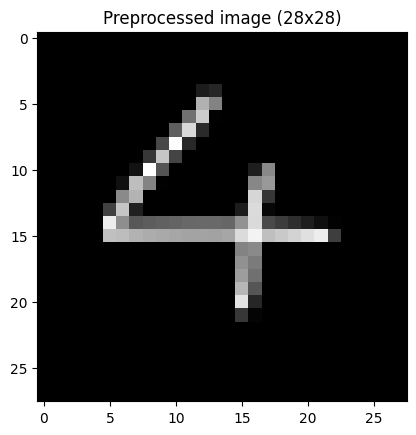

In [141]:
# ελέγχω
plt.imshow(test_image_array, cmap='gray')
plt.title('Preprocessed image (28x28)')
plt.show()

In [142]:
# κάντο διάυσμα
test_image_vector = test_image_array.flatten().reshape(1, -1)

# κάνω την κανονικοποίηση του βήματος 6
test_image = test_image_vector / 255.0

Και θα πάρω το μοντέλο με k=5, που είχε τη μεγαλύτερη ακρίβεια:

In [143]:
# αρχικοποίηση
knn = KNeighborsClassifier(n_neighbors=5)
# εκπαίδευση
knn.fit(x_train_vector_normalized, y_train)

KNeighborsClassifier()

In [144]:
prediction = knn.predict(test_image)
print(f"Πρόβλεψη: {prediction[0]}")

Πρόβλεψη: 4


Η πρόβλεψη είναι σωστή!